In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from os import path

data_dir = 'data/bank-transactions'
data_file = 'bank-transactions-groups.csv'
data_path = path.join(data_dir, data_file)

df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251810 entries, 0 to 251809
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CustGender               251810 non-null  float64
 1   CustAccountBalance       251810 non-null  float64
 2   TransactionAmount (INR)  251810 non-null  float64
 3   CustomerAge              251810 non-null  int64  
 4   TransactionTimestamp     251810 non-null  float64
 5   KMeans2                  251810 non-null  int64  
 6   KMeans3                  251810 non-null  int64  
 7   KMeans4                  251810 non-null  int64  
 8   HDBSCAN                  251810 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 17.3 MB


#### CONVERTENDO TIMESTAMP DE VOLTA

In [3]:
from datetime import datetime

def convertTimestamp(df):
    years, months, days, hours, minutes, seconds = [], [], [], [], [], []
    for timestamp in df['TransactionTimestamp']:
        dt = datetime.fromtimestamp(timestamp)
        years.append(dt.year)
        months.append(dt.month)
        days.append(dt.day)
        hours.append(dt.hour)
        minutes.append(dt.minute)
        seconds.append(dt.second)
    return np.array(years), np.array(months), np.array(days), np.array(hours), np.array(minutes), np.array(seconds)

Y, M, D, h, m, s = convertTimestamp(df)
df['TransactionYear'] = Y
df['TransactionMonth'] = M
df['TransactionDay'] = D
df['TransactionHour'] = h
df['TransactionMinute'] = m
df['TransactionSeconds'] = s

In [4]:
df

,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionTimestamp,KMeans2,KMeans3,KMeans4,HDBSCAN,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconds
0,1.0,17874.44,459.00,26,1.470159e+09,1,0,1,0,2016,8,2,14,27,12
1,1.0,866503.21,2060.00,49,1.470159e+09,1,0,1,0,2016,8,2,14,27,14
2,1.0,973.46,566.00,30,1.470170e+09,1,0,1,0,2016,8,2,17,38,6
3,0.0,95075.54,148.00,40,1.470168e+09,0,2,2,3,2016,8,2,17,5,37
4,0.0,4279.22,289.11,38,1.470177e+09,0,2,2,3,2016,8,2,19,24,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251805,0.0,11247.35,9363.00,41,1.474235e+09,0,1,0,-1,2016,9,18,18,42,25
251806,0.0,79257.14,1437.00,29,1.474235e+09,0,1,0,-1,2016,9,18,18,42,27
251807,1.0,235620.05,1058.00,51,1.474235e+09,1,0,3,0,2016,9,18,18,42,34
251808,0.0,1212.70,1500.00,30,1.474235e+09,0,1,0,-1,2016,9,18,18,47,34


# ANALISANDO AGRUPAMENTOS

### KMeans (K = 2)

In [5]:
chosen = 'KMeans2'

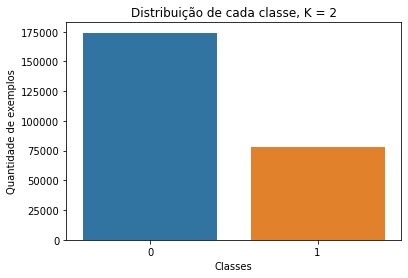

In [6]:
pcount = sns.countplot(data=df, x=chosen)
_ = pcount.set_title("Distribuição de cada classe, K = 2")
_ = pcount.set_xlabel("Classes")
_ = pcount.set_ylabel("Quantidade de exemplos")

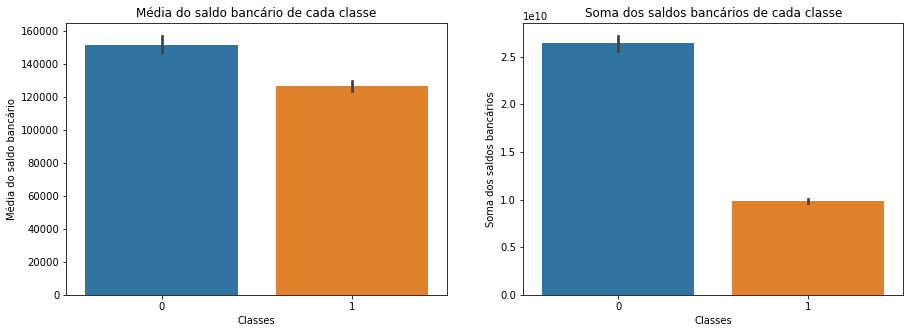

In [7]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))

pbar = sns.barplot(data=df, x=chosen, y='CustAccountBalance', estimator=np.mean, ax=axs[0])
_ = pbar.set_title("Média do saldo bancário de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Média do saldo bancário")

pbar = sns.barplot(data=df, x=chosen, y='CustAccountBalance', estimator=np.sum, ax=axs[1])
_ = pbar.set_title("Soma dos saldos bancários de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Soma dos saldos bancários")

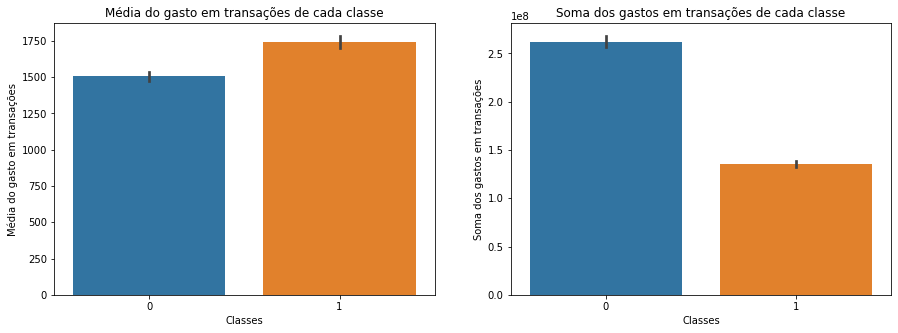

In [8]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))

pbar = sns.barplot(data=df, x=chosen, y='TransactionAmount (INR)', estimator=np.mean, ax=axs[0])
_ = pbar.set_title("Média do gasto em transações de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Média do gasto em transações")

pbar = sns.barplot(data=df, x=chosen, y='TransactionAmount (INR)', estimator=np.sum, ax=axs[1])
_ = pbar.set_title("Soma dos gastos em transações de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Soma dos gastos em transações")

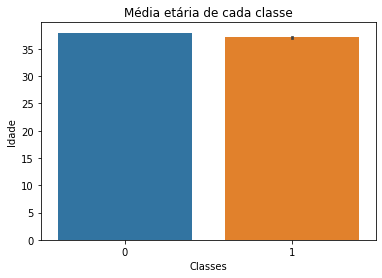

In [9]:
pbar = sns.barplot(data=df, x=chosen, y='CustomerAge', estimator=np.mean)
_ = pbar.set_title("Média etária de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Idade")

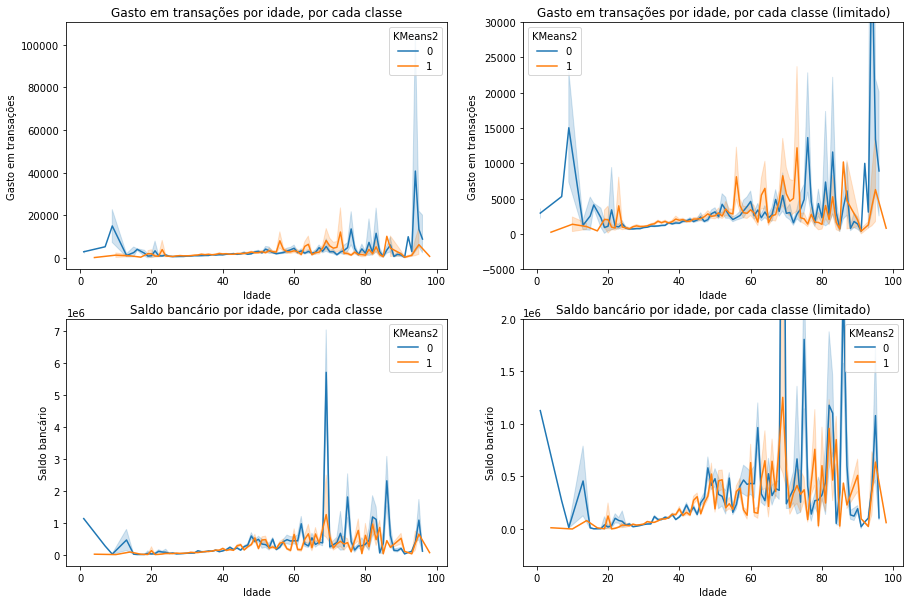

In [10]:
_, axs = plt.subplots(2, 2, figsize=(15, 10))

pline = sns.lineplot(data=df, x='CustomerAge', y='TransactionAmount (INR)', hue=chosen, ax=axs[0][0])
_ = pline.set_title("Gasto em transações por idade, por cada classe")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Gasto em transações")

lim = 30000
pline = sns.lineplot(data=df, x='CustomerAge', y='TransactionAmount (INR)', hue=chosen, ax=axs[0][1])
_ = pline.set_title("Gasto em transações por idade, por cada classe (limitado)")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Gasto em transações")
_ = pline.set_ylim(None, lim)

pline = sns.lineplot(data=df, x='CustomerAge', y='CustAccountBalance', hue=chosen, ax=axs[1][0])
_ = pline.set_title("Saldo bancário por idade, por cada classe")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Saldo bancário")

lim = 2e6
pline = sns.lineplot(data=df, x='CustomerAge', y='CustAccountBalance', hue=chosen, ax=axs[1][1])
_ = pline.set_title("Saldo bancário por idade, por cada classe (limitado)")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Saldo bancário")
_ = pline.set_ylim(None, lim)

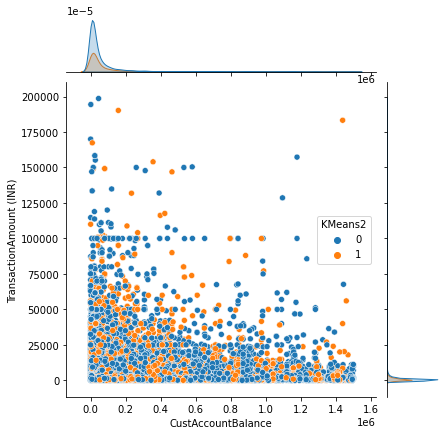

In [11]:
inr_limit = 0.2e6
acc_limit = 1.5e6

pscatter = sns.jointplot(
    data=df[ (df['TransactionAmount (INR)'] < inr_limit) & (df['CustAccountBalance'] < acc_limit) ],
    kind='scatter',
    hue=chosen,
    x='CustAccountBalance',
    y='TransactionAmount (INR)'
)

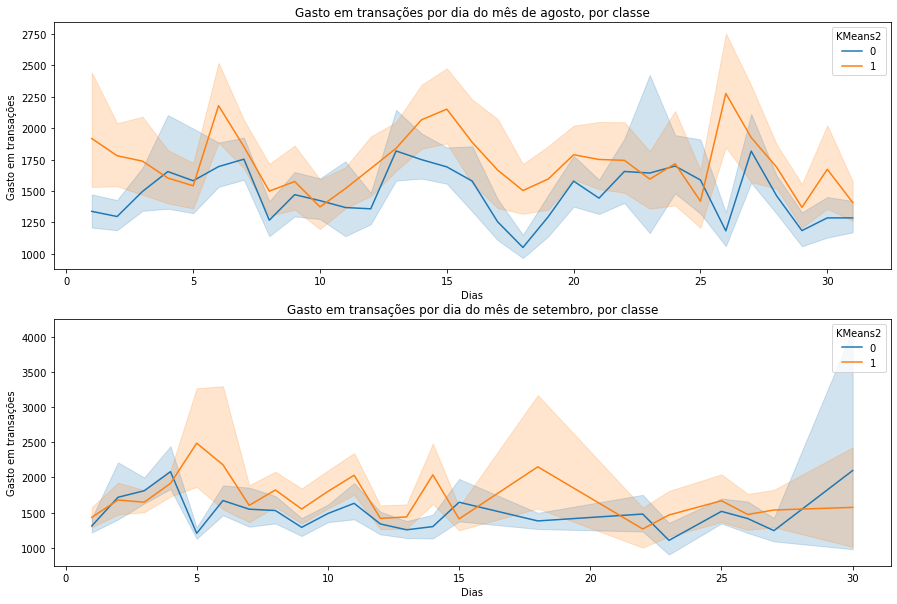

In [12]:
_, axs = plt.subplots(2, 1, figsize=(15, 10))

pline = sns.lineplot(data=df[ df['TransactionMonth'] == 8 ], 
                     x='TransactionDay', y='TransactionAmount (INR)', hue=chosen, ax=axs[0])
_ = pline.set_title("Gasto em transações por dia do mês de agosto, por classe")
_ = pline.set_xlabel("Dias")
_ = pline.set_ylabel("Gasto em transações")

pline = sns.lineplot(data=df[ df['TransactionMonth'] == 9 ], 
                     x='TransactionDay', y='TransactionAmount (INR)', hue=chosen, ax=axs[1])
_ = pline.set_title("Gasto em transações por dia do mês de setembro, por classe")
_ = pline.set_xlabel("Dias")
_ = pline.set_ylabel("Gasto em transações")

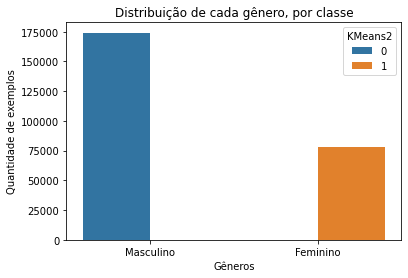

In [13]:
pcount = sns.countplot(
    data=df, 
    x='CustGender', 
    hue=chosen
)
_ = pcount.set_title("Distribuição de cada gênero, por classe")
_ = pcount.set_xlabel("Gêneros")
_ = pcount.set_ylabel("Quantidade de exemplos")
_ = pcount.set_xticks([0., 1.], ["Masculino", "Feminino"])

### KMeans (K = 3)

In [40]:
chosen = 'KMeans3'

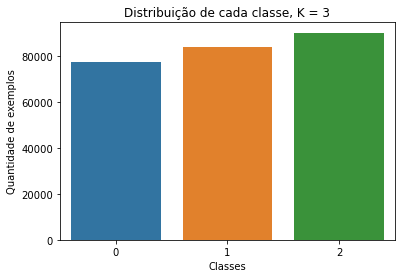

In [15]:
pcount = sns.countplot(data=df, x=chosen)
_ = pcount.set_title("Distribuição de cada classe, K = 3")
_ = pcount.set_xlabel("Classes")
_ = pcount.set_ylabel("Quantidade de exemplos")

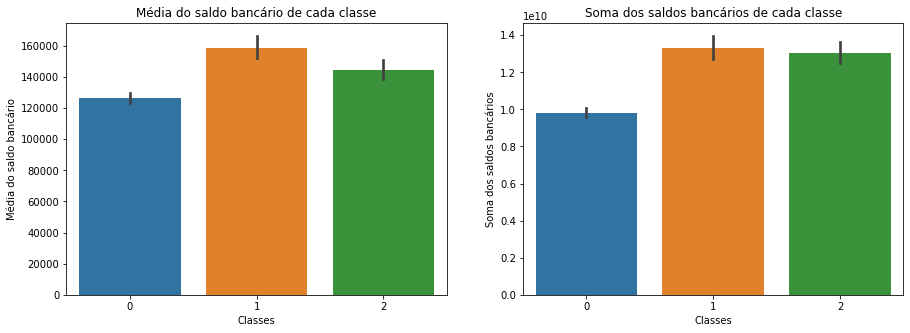

In [16]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))

pbar = sns.barplot(data=df, x=chosen, y='CustAccountBalance', estimator=np.mean, ax=axs[0])
_ = pbar.set_title("Média do saldo bancário de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Média do saldo bancário")

pbar = sns.barplot(data=df, x=chosen, y='CustAccountBalance', estimator=np.sum, ax=axs[1])
_ = pbar.set_title("Soma dos saldos bancários de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Soma dos saldos bancários")

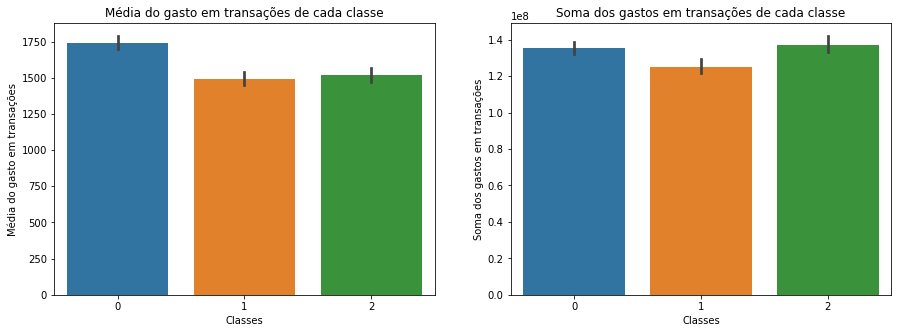

In [17]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))

pbar = sns.barplot(data=df, x=chosen, y='TransactionAmount (INR)', estimator=np.mean, ax=axs[0])
_ = pbar.set_title("Média do gasto em transações de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Média do gasto em transações")

pbar = sns.barplot(data=df, x=chosen, y='TransactionAmount (INR)', estimator=np.sum, ax=axs[1])
_ = pbar.set_title("Soma dos gastos em transações de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Soma dos gastos em transações")

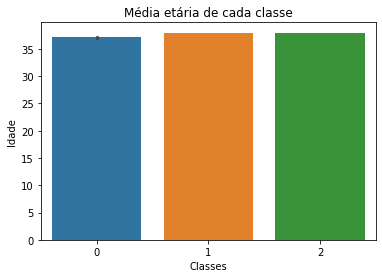

In [18]:
pbar = sns.barplot(data=df, x=chosen, y='CustomerAge', estimator=np.mean)
_ = pbar.set_title("Média etária de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Idade")

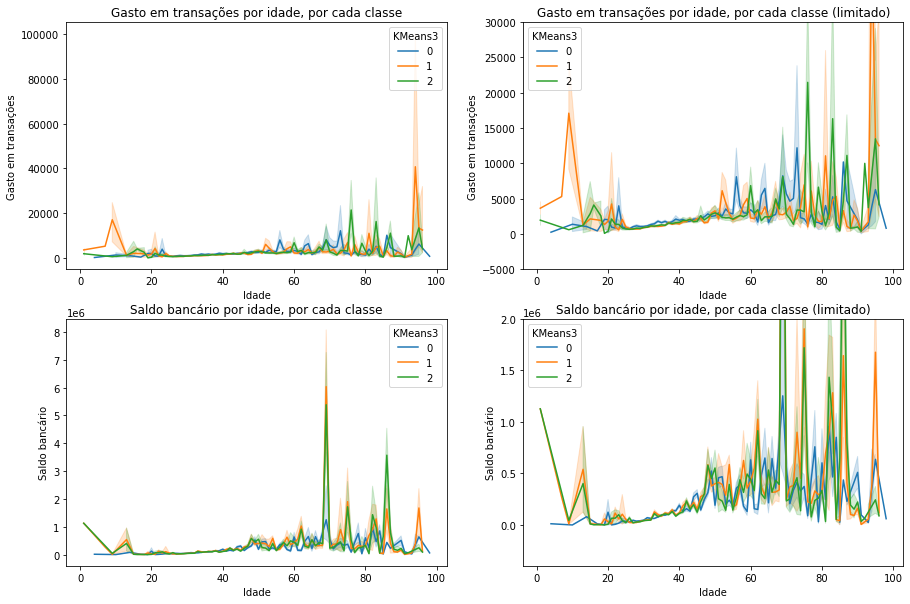

In [25]:
_, axs = plt.subplots(2, 2, figsize=(15, 10))

pline = sns.lineplot(data=df, x='CustomerAge', y='TransactionAmount (INR)', hue=chosen, ax=axs[0][0], palette=['C0', 'C1', 'C2'])
_ = pline.set_title("Gasto em transações por idade, por cada classe")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Gasto em transações")

lim = 30000
pline = sns.lineplot(data=df, x='CustomerAge', y='TransactionAmount (INR)', hue=chosen, ax=axs[0][1], palette=['C0', 'C1', 'C2'])
_ = pline.set_title("Gasto em transações por idade, por cada classe (limitado)")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Gasto em transações")
_ = pline.set_ylim(None, lim)

pline = sns.lineplot(data=df, x='CustomerAge', y='CustAccountBalance', hue=chosen, ax=axs[1][0], palette=['C0', 'C1', 'C2'])
_ = pline.set_title("Saldo bancário por idade, por cada classe")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Saldo bancário")

lim = 2e6
pline = sns.lineplot(data=df, x='CustomerAge', y='CustAccountBalance', hue=chosen, ax=axs[1][1], palette=['C0', 'C1', 'C2'])
_ = pline.set_title("Saldo bancário por idade, por cada classe (limitado)")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Saldo bancário")
_ = pline.set_ylim(None, lim)

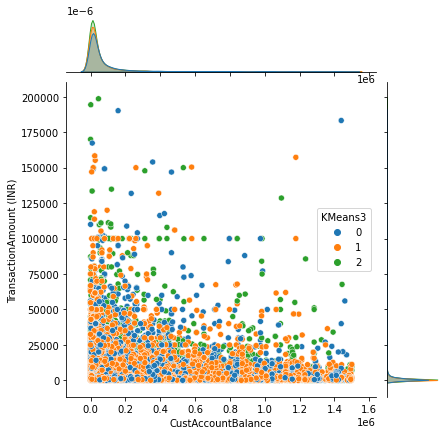

In [24]:
inr_limit = 0.2e6
acc_limit = 1.5e6

pscatter = sns.jointplot(
    data=df[ (df['TransactionAmount (INR)'] < inr_limit) & (df['CustAccountBalance'] < acc_limit) ],
    kind='scatter',
    hue=chosen,
    x='CustAccountBalance',
    y='TransactionAmount (INR)',
    palette=['C0', 'C1', 'C2']
)

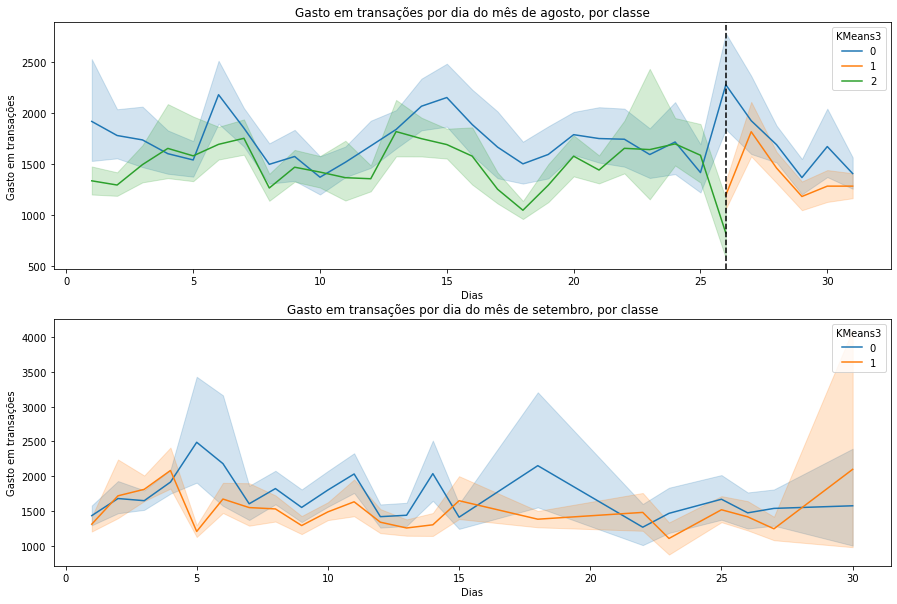

In [44]:
_, axs = plt.subplots(2, 1, figsize=(15, 10))

pline = sns.lineplot(data=df[ df['TransactionMonth'] == 8 ], 
                     x='TransactionDay', y='TransactionAmount (INR)', hue=chosen, ax=axs[0], palette=['C0', 'C1', 'C2'])
_ = pline.set_title("Gasto em transações por dia do mês de agosto, por classe")
_ = pline.set_xlabel("Dias")
_ = pline.set_ylabel("Gasto em transações")
_ = pline.axvline(x=26, color='black', ls='--')

pline = sns.lineplot(data=df[ df['TransactionMonth'] == 9 ], 
                     x='TransactionDay', y='TransactionAmount (INR)', hue=chosen, ax=axs[1])
_ = pline.set_title("Gasto em transações por dia do mês de setembro, por classe")
_ = pline.set_xlabel("Dias")
_ = pline.set_ylabel("Gasto em transações")

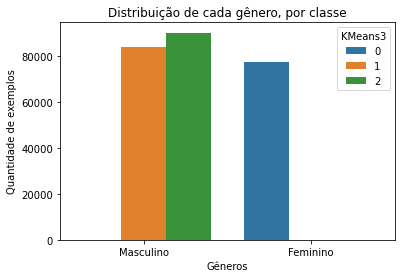

In [22]:
pcount = sns.countplot(
    data=df, 
    x='CustGender', 
    hue=chosen
)
_ = pcount.set_title("Distribuição de cada gênero, por classe")
_ = pcount.set_xlabel("Gêneros")
_ = pcount.set_ylabel("Quantidade de exemplos")
_ = pcount.set_xticks([0., 1.], ["Masculino", "Feminino"])

### KMeans (K = 4)

In [45]:
chosen = 'KMeans4'

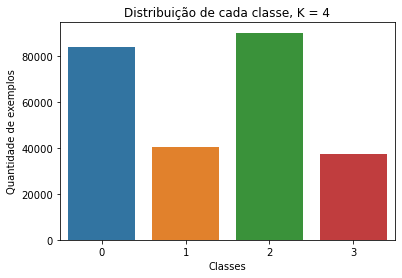

In [28]:
pcount = sns.countplot(data=df, x=chosen)
_ = pcount.set_title("Distribuição de cada classe, K = 4")
_ = pcount.set_xlabel("Classes")
_ = pcount.set_ylabel("Quantidade de exemplos")

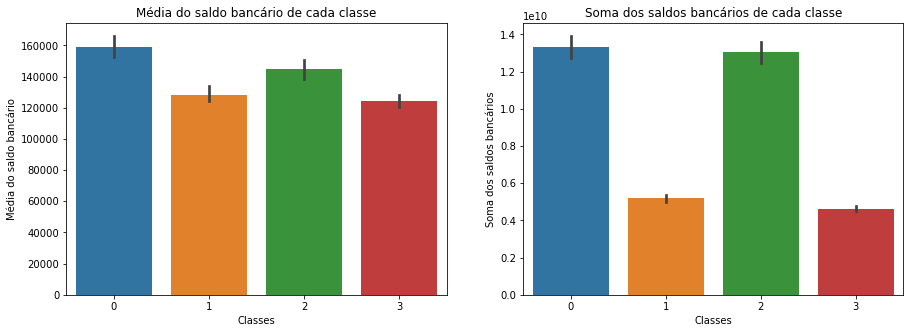

In [29]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))

pbar = sns.barplot(data=df, x=chosen, y='CustAccountBalance', estimator=np.mean, ax=axs[0])
_ = pbar.set_title("Média do saldo bancário de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Média do saldo bancário")

pbar = sns.barplot(data=df, x=chosen, y='CustAccountBalance', estimator=np.sum, ax=axs[1])
_ = pbar.set_title("Soma dos saldos bancários de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Soma dos saldos bancários")

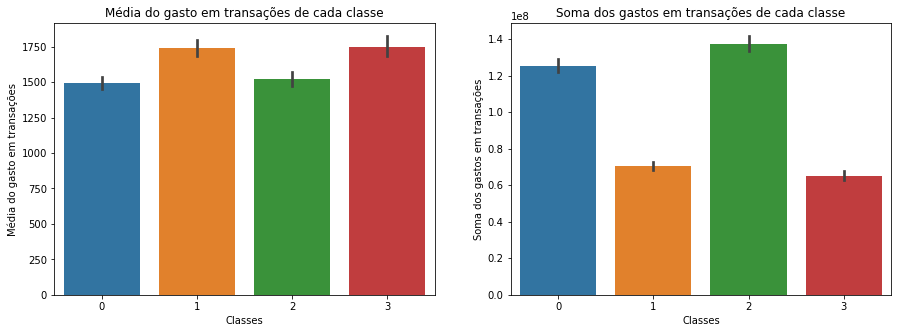

In [30]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))

pbar = sns.barplot(data=df, x=chosen, y='TransactionAmount (INR)', estimator=np.mean, ax=axs[0])
_ = pbar.set_title("Média do gasto em transações de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Média do gasto em transações")

pbar = sns.barplot(data=df, x=chosen, y='TransactionAmount (INR)', estimator=np.sum, ax=axs[1])
_ = pbar.set_title("Soma dos gastos em transações de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Soma dos gastos em transações")

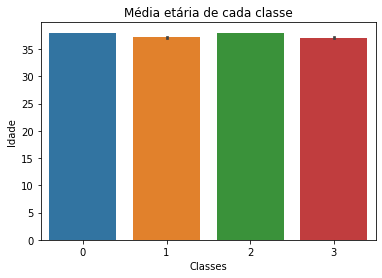

In [31]:
pbar = sns.barplot(data=df, x=chosen, y='CustomerAge', estimator=np.mean)
_ = pbar.set_title("Média etária de cada classe")
_ = pbar.set_xlabel("Classes")
_ = pbar.set_ylabel("Idade")

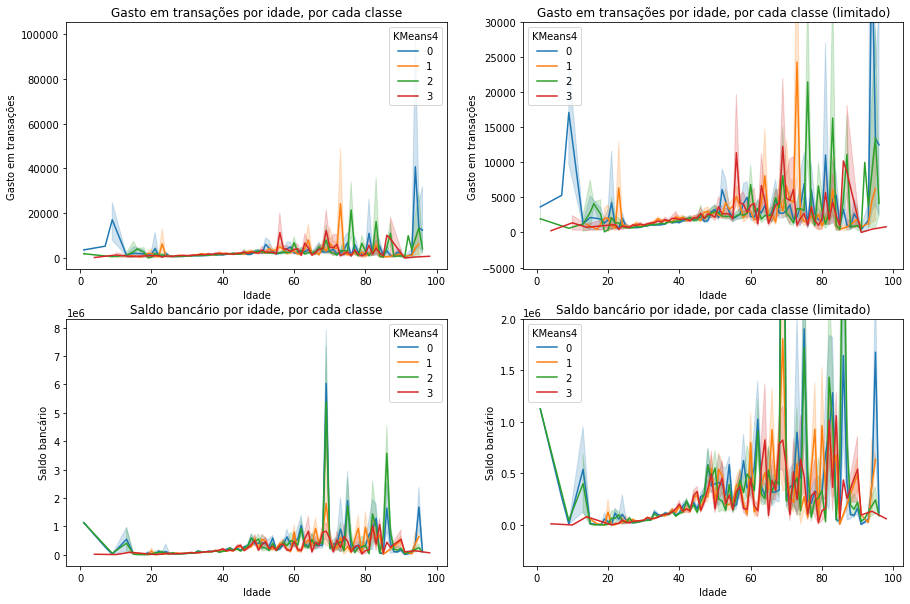

In [32]:
_, axs = plt.subplots(2, 2, figsize=(15, 10))

pline = sns.lineplot(data=df, x='CustomerAge', y='TransactionAmount (INR)', hue=chosen, ax=axs[0][0], palette=['C0', 'C1', 'C2', 'C3'])
_ = pline.set_title("Gasto em transações por idade, por cada classe")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Gasto em transações")

lim = 30000
pline = sns.lineplot(data=df, x='CustomerAge', y='TransactionAmount (INR)', hue=chosen, ax=axs[0][1], palette=['C0', 'C1', 'C2', 'C3'])
_ = pline.set_title("Gasto em transações por idade, por cada classe (limitado)")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Gasto em transações")
_ = pline.set_ylim(None, lim)

pline = sns.lineplot(data=df, x='CustomerAge', y='CustAccountBalance', hue=chosen, ax=axs[1][0], palette=['C0', 'C1', 'C2', 'C3'])
_ = pline.set_title("Saldo bancário por idade, por cada classe")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Saldo bancário")

lim = 2e6
pline = sns.lineplot(data=df, x='CustomerAge', y='CustAccountBalance', hue=chosen, ax=axs[1][1], palette=['C0', 'C1', 'C2', 'C3'])
_ = pline.set_title("Saldo bancário por idade, por cada classe (limitado)")
_ = pline.set_xlabel("Idade")
_ = pline.set_ylabel("Saldo bancário")
_ = pline.set_ylim(None, lim)

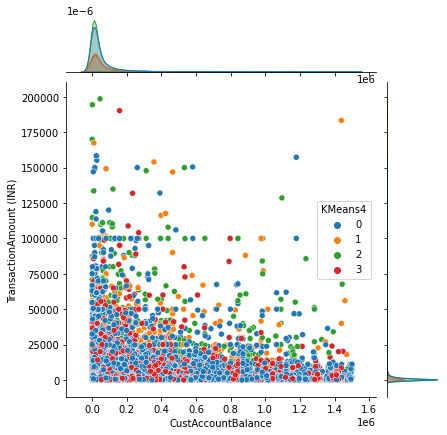

In [33]:
inr_limit = 0.2e6
acc_limit = 1.5e6

pscatter = sns.jointplot(
    data=df[ (df['TransactionAmount (INR)'] < inr_limit) & (df['CustAccountBalance'] < acc_limit) ],
    kind='scatter',
    hue=chosen,
    x='CustAccountBalance',
    y='TransactionAmount (INR)',
    palette=['C0', 'C1', 'C2', 'C3']
)

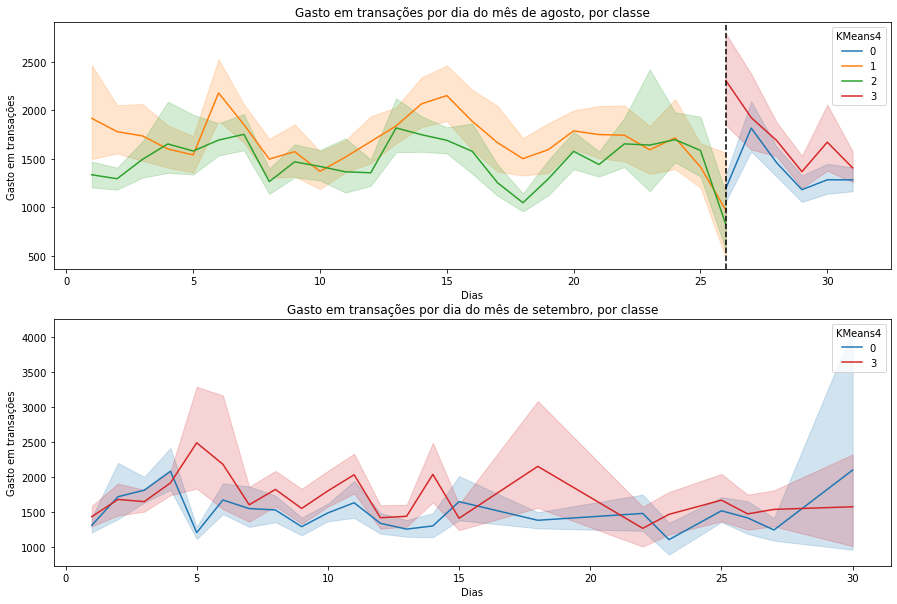

In [46]:
_, axs = plt.subplots(2, 1, figsize=(15, 10))

pline = sns.lineplot(data=df[ df['TransactionMonth'] == 8 ], 
                     x='TransactionDay', y='TransactionAmount (INR)', hue=chosen, ax=axs[0], palette=['C0', 'C1', 'C2', 'C3'])
_ = pline.set_title("Gasto em transações por dia do mês de agosto, por classe")
_ = pline.set_xlabel("Dias")
_ = pline.set_ylabel("Gasto em transações")
_ = pline.axvline(x=26, color='black', ls='--')

pline = sns.lineplot(data=df[ df['TransactionMonth'] == 9 ], 
                     x='TransactionDay', y='TransactionAmount (INR)', hue=chosen, ax=axs[1], palette=['C0', 'C3'])
_ = pline.set_title("Gasto em transações por dia do mês de setembro, por classe")
_ = pline.set_xlabel("Dias")
_ = pline.set_ylabel("Gasto em transações")

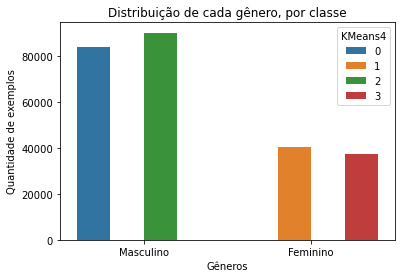

In [35]:
pcount = sns.countplot(
    data=df, 
    x='CustGender', 
    hue=chosen
)
_ = pcount.set_title("Distribuição de cada gênero, por classe")
_ = pcount.set_xlabel("Gêneros")
_ = pcount.set_ylabel("Quantidade de exemplos")
_ = pcount.set_xticks([0., 1.], ["Masculino", "Feminino"])